[20220817]

# 2. Model 1

Auto arima

## Goal
Find patterns on the features for target

## Plan
Checklist what will be done on the notebook :

        [ ] Get Data
        [ ] Modelling
                [ ] Hyper Parameter Tuning
                [ ] Feature selection (could be done with different notebook)
        [ ] Evaluation

In [ ]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import pmdarima
sys.path.insert(1,'../../src/')

## import myfunc inside src folder
import myfunc 

In [ ]:
with open("../../config.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

PATH_RAW = config['path']['raw']
PATH_INTERIM = config['path']['interim']
PATH_PROCESSED = config['path']['processed']
PATH_MODEL = config['path']['artifact']+os.getcwd().split('\\')[-1]+'/'
PATH_UDF = config['path']['udf']

## Get Data

In [ ]:
df = pd.read_csv(PATH_INTERIM + 'daily-min-temp3_iter0.csv')
df.set_index('Date',inplace=True)

In [ ]:
df

In [ ]:
# ! pip install pmdarima

## Model 1

In [ ]:
arima_model1 = pmdarima.arima.auto_arima(df, d = 1, max_d = 2
                         ,start_p = 1, max_p = 9
                         ,start_q = 20, max_q = 40
                         ,D = 1, max_D = 2
                         ,start_P = 0, max_P = 2
                         ,start_Q = 0, max_Q = 2
                         ,m = 7
                         ,seasonal = True
                         ,startionary = True
                         ,stepwise = False
                         ,trace = True
                         ,n_jobs = 5
                         ,random = True
                         ,n_fits = 35)

# arima_model1 = pmdarima.arima.auto_arima(df, start_p=1, start_q=1,
#                       test='adf',
#                       max_p=5, max_q=5,
#                       m=1,             
#                       d=1,          
#                       seasonal=False,   
#                       start_P=0, 
#                       D=None, 
#                       trace=True,
#                       error_action='ignore',  
#                       suppress_warnings=True
#                          ,n_jobs = 5
#                          ,random = True
#                          ,n_fits = 35)

In [ ]:
arima_model1.summary()

<AxesSubplot:>

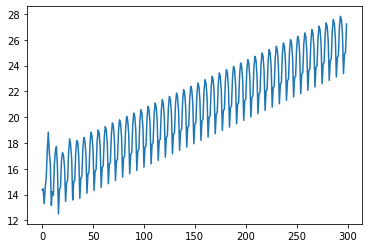

 ARIMA(0,1,1)(2,1,1)[7]             : AIC=inf, Time=5.94 sec
 ARIMA(3,1,2)(0,1,0)[7]             : AIC=inf, Time=5.82 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=inf, Time=7.29 sec
 ARIMA(3,1,0)(0,1,0)[7]             : AIC=15795.084, Time=0.33 sec
 ARIMA(2,1,1)(0,1,0)[7]             : AIC=inf, Time=2.32 sec
 ARIMA(0,1,2)(2,1,1)[7]             : AIC=inf, Time=6.91 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=14957.171, Time=1.16 sec
 ARIMA(1,1,3)(0,1,0)[7]             : AIC=inf, Time=3.93 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=6.16 sec
 ARIMA(3,1,0)(0,1,2)[7]             : AIC=inf, Time=8.04 sec
 ARIMA(2,1,3)(0,1,0)[7]             : AIC=inf, Time=8.60 sec
 ARIMA(1,1,4)(0,1,0)[7]             : AIC=inf, Time=5.83 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=2.26 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=15100.537, Time=0.73 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=1.81 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=14747.166, Time=1.25 sec


In [20]:
pd.Series(arima_model1.predict(n_periods=300)).plot()